# Largest Public Companies in the US Companies By Revenue

### Tools Used;
* Web Scraping with BeautifulSoup
* Pandas
* Matplotlib
  

### Content
1. Web Scraping with Python
2. Saving Dataframe as CSV File
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Visualization

## Web Scraping with Python

In [1]:
import pandas as pd

In [2]:
!pip install bs4
!pip install requests pandas html5lib 

In [3]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [4]:
webpage = requests.get("https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue")
#webpage.text

In [5]:
soup = BeautifulSoup(webpage.text, "html.parser")
#soup

In [6]:
tables = soup.find_all("table")
#tables[0]

In [7]:
#since the table we want is the first table on the webpage
table = soup.find("table")
#table

In [8]:
table.find_all("th")

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [9]:
table_headers = [header.text.replace("\n", "") for header in table.find_all("th")]
print(table_headers)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
us_companies_revenue =  pd.DataFrame(columns = table_headers)
us_companies_revenue 

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [11]:
us_companies_revenue =  pd.DataFrame(columns = table_headers)
for table_row in table.find_all("tr"):
    cell = table_row.find_all("td")
    if cell: #to exclude the rows with th
        rank = cell[0].text.replace("\n", "")
        name = cell[1].text.replace("\n", "")
        industry = cell[2].text.replace("\n", "")
        revenue = cell[3].text.replace("\n", "")
        revenue_growth = cell[4].text.replace("\n", "")
        employees = cell[5].text.replace("\n", "")
        headquarters = cell[6].text.replace("\n", "")

        us_companies_revenue = pd.concat([us_companies_revenue, pd.DataFrame({
            "Rank": [rank], "Name": [name], "Industry": [industry], "Revenue (USD millions)": [revenue], "Revenue growth": [revenue_growth],
            "Employees": [employees], "Headquarters": [headquarters]
        })], ignore_index = True)
        
us_companies_revenue.head() 

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [12]:
#Better format
public_us_companies = pd.DataFrame(columns = table_headers)
for table_row in table.find_all("tr"):
    rows = table_row.find_all("td")
    if rows:
        cell_data = [data.text.strip() for data in rows]
        #print(cell_data)
        index = len(public_us_companies)
        public_us_companies.loc[index] = cell_data
public_us_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [13]:
private_us_companies =  pd.DataFrame(columns = [header.text.strip() for header in tables[1].find_all("th")])
for rows in tables[1].find_all("tr")[1:]:
    cell = [cell_data.text.strip() for cell_data in rows.find_all("td")]
    row_index = len(private_us_companies)
    private_us_companies.loc[row_index] = cell
    #print(cell)
private_us_companies

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"
5,6,Reyes Holdings,Wholesaling,40,"36,000","Rosemont, Illinois"
6,7,Enterprise Holdings,Car rental,35,"90,000","Clayton, Missouri"
7,8,C&S Wholesale Grocers,Wholesaling,34.7,"15,000","Keene, New Hampshire"
8,9,Love's,Petroleum industry and Retail,26.5,"40,000","Oklahoma City, Oklahoma"
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,"24,000","Miramar, Florida"


### Saving Dataframe as a CSV File

In [14]:
us_companies_revenue.to_csv("TopUSPublicCompaniesByRevenue.csv", index = False)

In [15]:
pd.read_csv("TopUSPublicCompaniesByRevenue.csv")

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


## Data Cleaning 


In [16]:
public_us_companies.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [17]:
public_us_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


### Changing Datatypes

In [18]:
public_us_companies["Revenue (USD millions)"] = public_us_companies["Revenue (USD millions)"].str.replace(",", "").astype(int)
public_us_companies["Revenue growth"] = public_us_companies["Revenue growth"].str.replace("%", "").astype(float)
public_us_companies["Employees"] = public_us_companies["Employees"].str.replace(",", "").astype(int)
public_us_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(2), object(4)
memory usage: 5.5+ KB


In [19]:
public_us_companies.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska"


### Renaming Columns

In [20]:
#Changing the revenue column to billions
public_us_companies["Revenue (USD millions)"] = public_us_companies["Revenue (USD millions)"]/1000
public_us_companies.rename(columns = {"Revenue (USD millions)": "Revenue (USD billions)"}, inplace = True)
public_us_companies.head()

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648.125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383.482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,"Omaha, Nebraska"


In [21]:
print(public_us_companies["Industry"].unique())

['Retail' 'Retail and cloud computing' 'Electronics industry' 'Healthcare'
 'Conglomerate' 'Petroleum industry' 'Technology and cloud computing'
 'Health' 'Pharmacy wholesale' 'Financial services' 'Health insurance'
 'Automotive industry' 'Financials' 'Pharmaceutical industry' 'Technology'
 'Telecommunications' 'Conglomerate and telecommunications'
 'Automotive and energy' 'Food industry' 'Beverage' 'Transportation'
 'Media' 'Consumer products manufacturing' 'Aerospace and defense'
 'Food service' 'Financial' 'Machinery' 'Insurance'
 'Agriculture manufacturing' 'Airline' 'Infotech'
 'Telecom hardware manufacturing' 'Food processing' 'Apparel'
 'Energy trading' 'Agriculture cooperative' 'Chemical industry']


In [22]:
print(len(public_us_companies["Industry"].unique()))

37


In [23]:
print(len(public_us_companies["Headquarters"].unique()))

71


In [24]:
df = public_us_companies
df.head()

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648.125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383.482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,"Omaha, Nebraska"


In [25]:
df1 = (df["Headquarters"].str.split(",", n =1, expand = True).rename(columns = {0: "Headquarters City", 1: "Headquarters State"}))
df1

,Headquarters City,Headquarters State
0,Bentonville,Arkansas
1,Seattle,Washington
2,Cupertino,California
3,Minnetonka,Minnesota
4,Omaha,Nebraska
...,...,...
95,New York City,New York
96,Inver Grove Heights,Minnesota
97,New York City,New York
98,Midland,Michigan


In [26]:
df = df.join(df1).drop(columns = "Headquarters")
df

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters City,Headquarters State
0,1,Walmart,Retail,648.125,6.0,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,Seattle,Washington
2,3,Apple,Electronics industry,383.482,-2.8,161000,Cupertino,California
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,Minnetonka,Minnesota
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,Omaha,Nebraska
...,...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45.735,11.8,16023,New York City,New York
96,97,CHS,Agriculture cooperative,45.590,-4.6,10609,Inver Grove Heights,Minnesota
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45.006,-2.5,34100,New York City,New York
98,99,Dow Chemical Company,Chemical industry,44.622,-21.6,35900,Midland,Michigan


## Exploratory Data Analysis

In [27]:
df.head(10)

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters City,Headquarters State
0,1,Walmart,Retail,648.125,6.0,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,Seattle,Washington
2,3,Apple,Electronics industry,383.482,-2.8,161000,Cupertino,California
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,Minnetonka,Minnesota
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,Omaha,Nebraska
5,6,CVS Health,Healthcare,357.776,10.9,259500,Woonsocket,Rhode Island
6,7,ExxonMobil,Petroleum industry,344.582,-16.7,61500,Spring,Texas
7,8,Alphabet,Technology and cloud computing,307.394,8.7,182502,Mountain View,California
8,9,McKesson Corporation,Health,276.711,4.8,48000,Irving,Texas
9,10,Cencora,Pharmacy wholesale,262.173,9.9,44000,Conshohocken,Pennsylvania


In [28]:
df[["Revenue (USD billions)"]].describe()

,Revenue (USD billions)
count,100.000000
mean,122.346090
std,107.882042
min,43.452000
25%,54.608500
50%,80.296000
75%,149.927250
max,648.125000


In [29]:
df[["Employees"]].describe()

,Employees
count,1.000000e+02
mean,1.626779e+05
std,2.669024e+05
min,4.137000e+03
25%,4.500000e+04
50%,8.650000e+04
75%,1.891625e+05
max,2.100000e+06


In [30]:
df[["Headquarters State"]].describe()

,Headquarters State
count,100
unique,28
top,Texas
freq,16


In [31]:
df[["Industry"]].describe()

,Industry
count,100
unique,37
top,Financials
freq,13


## Data Visualization

In [32]:
import matplotlib.pyplot as plt

In [33]:
df.head()

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters City,Headquarters State
0,1,Walmart,Retail,648.125,6.0,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,Seattle,Washington
2,3,Apple,Electronics industry,383.482,-2.8,161000,Cupertino,California
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,Minnetonka,Minnesota
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,Omaha,Nebraska


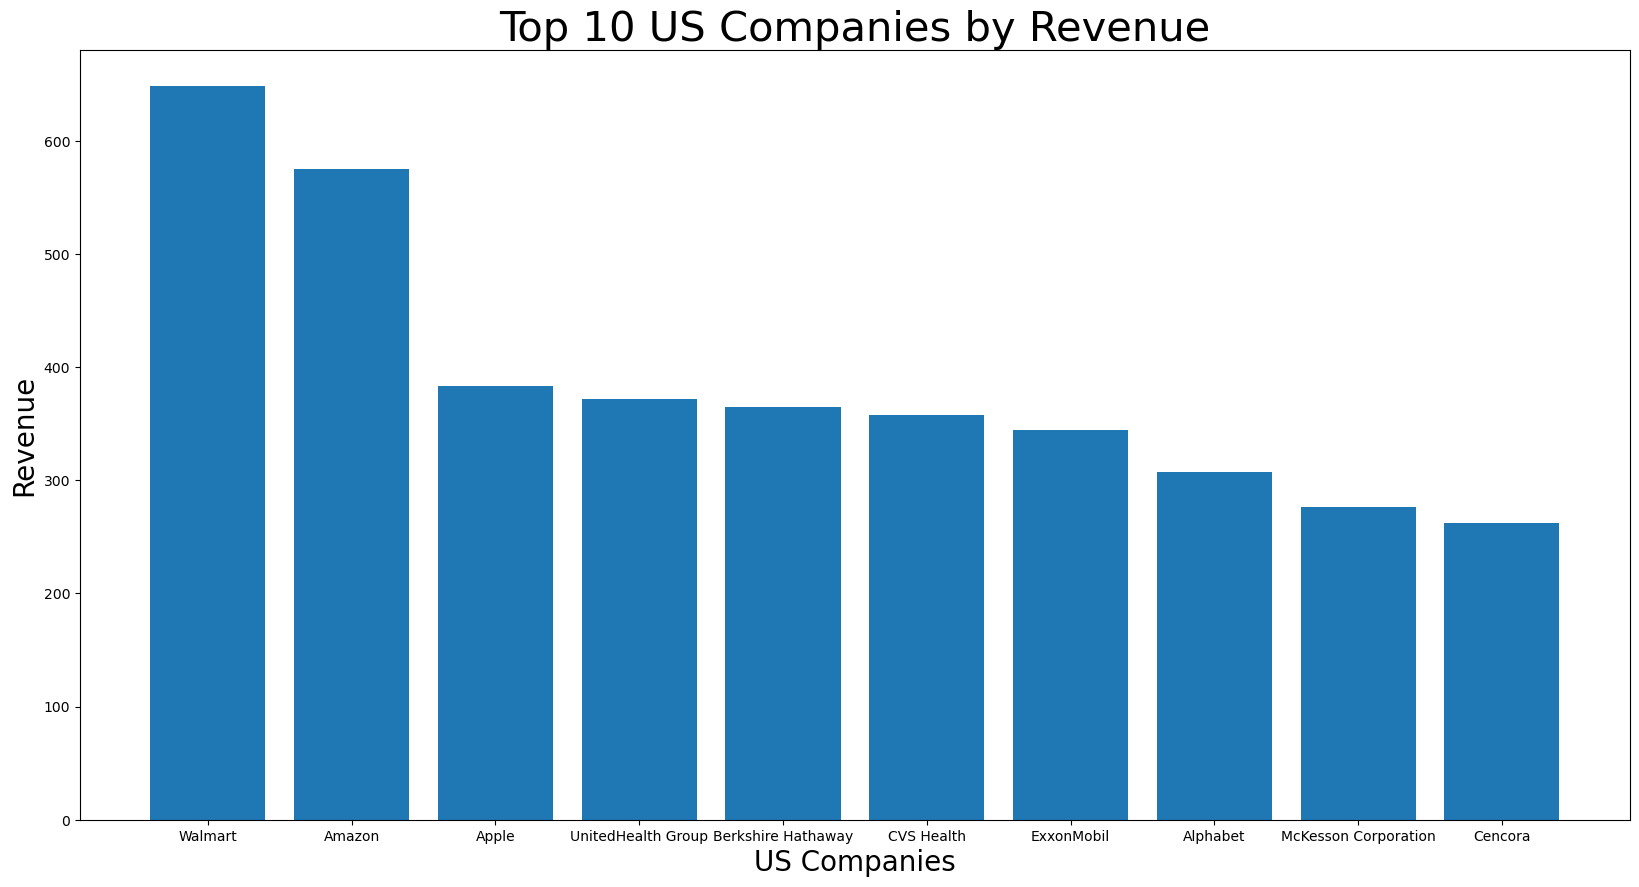

In [62]:
plt.figure(figsize=(20, 10))
plt.bar(x = df.head(10)["Name"], height= df.head(10)["Revenue (USD billions)"])
plt.xlabel("US Companies", fontsize = 20)
plt.ylabel("Revenue", fontsize = 20)
plt.title("Top 10 US Companies by Revenue", fontsize = 30)

plt.show()

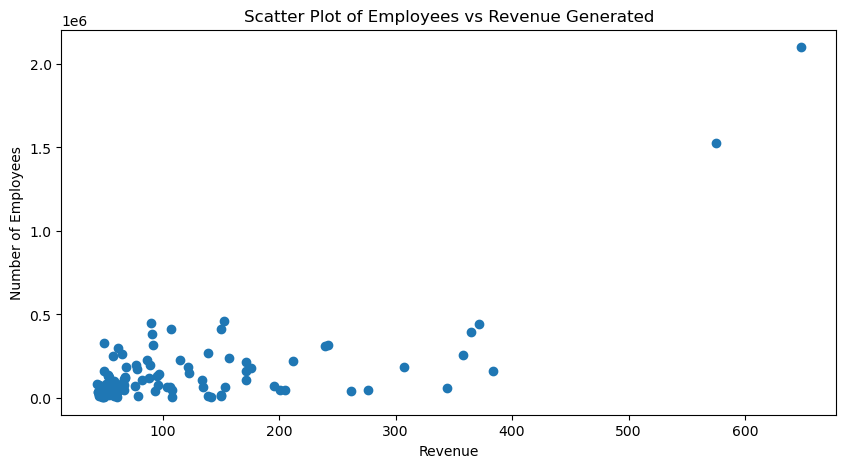

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(x = df["Revenue (USD billions)"], y= df["Employees"])
plt.xlabel("Revenue")
plt.ylabel("Number of Employees")
plt.title("Scatter Plot of Employees vs Revenue Generated")

plt.show()

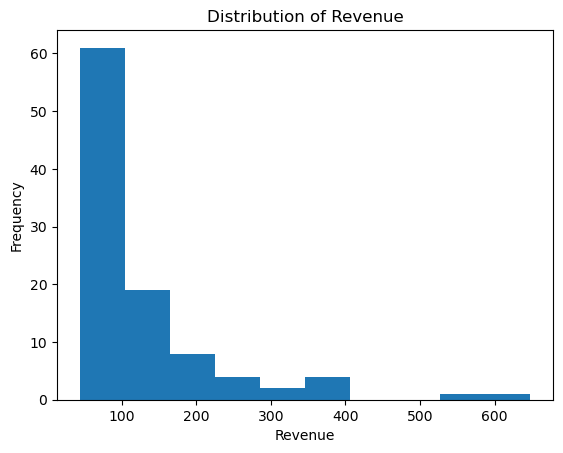

In [36]:
plt.hist(df["Revenue (USD billions)"])
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue")
plt.show()

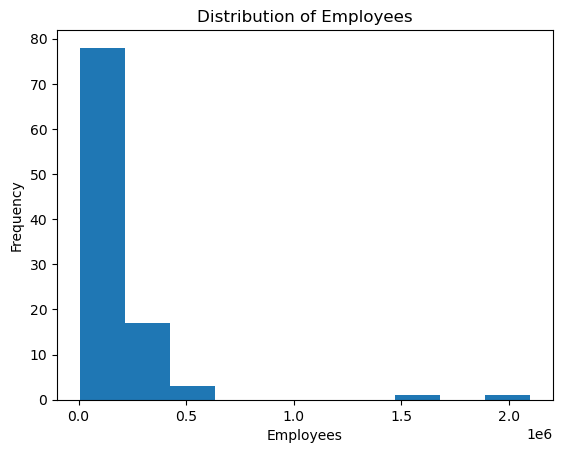

In [37]:
plt.hist(df["Employees"])
plt.xlabel("Employees")
plt.ylabel("Frequency")
plt.title("Distribution of Employees")

plt.show()

In [50]:
grouped_data = df.groupby("Industry")[["Employees", "Revenue (USD billions)"]].sum().reset_index()
grouped_data.head()

,Industry,Employees,Revenue (USD billions)
0,Aerospace and defense,293000,145.365
1,Agriculture cooperative,10609,45.590
2,Agriculture manufacturing,82956,61.251
3,Airline,338400,164.553
4,Apparel,83700,51.217


<function matplotlib.pyplot.show(close=None, block=None)>

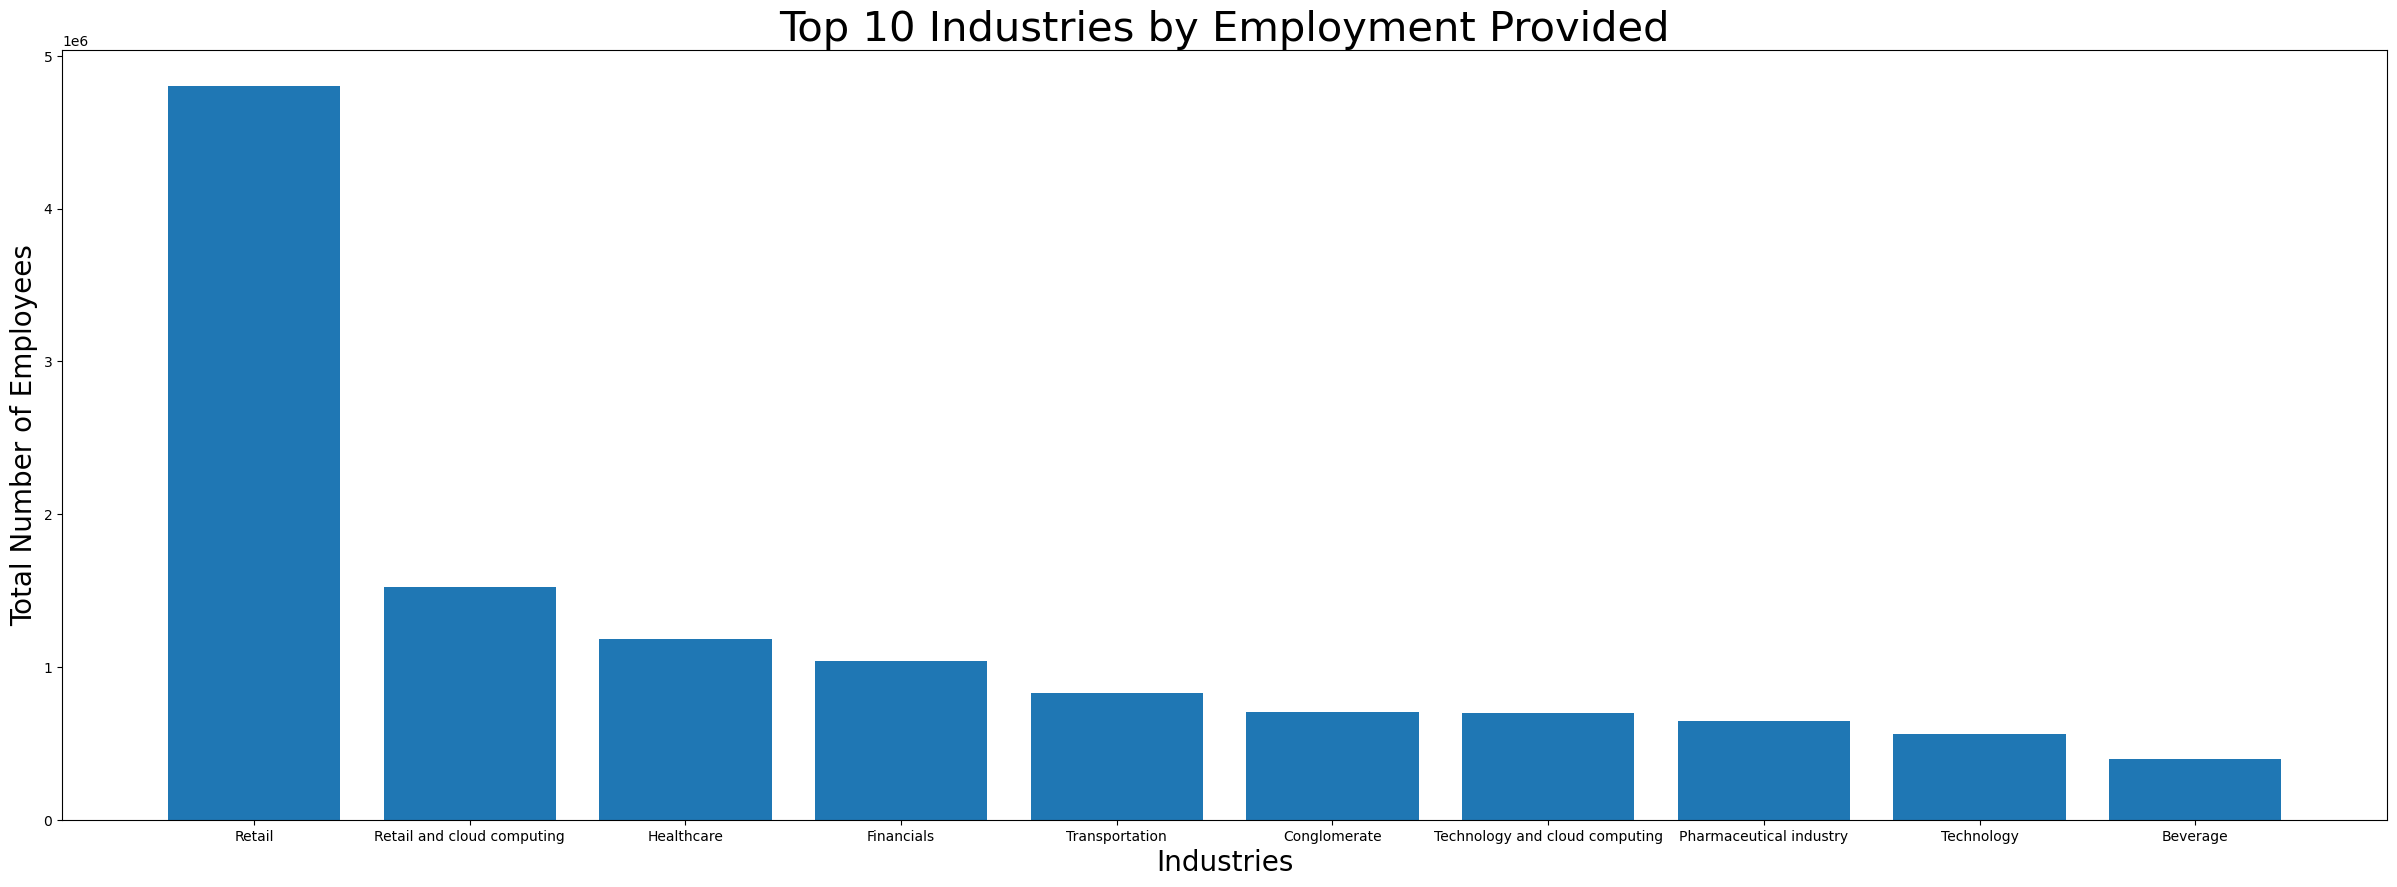

In [61]:
sorted_by_employees = grouped_data.sort_values("Employees", ascending = False)
plt.figure(figsize = (30, 10))
plt.bar(x= sorted_by_employees.head(10)["Industry"], height=sorted_by_employees.head(10)["Employees"] )
plt.xlabel("Industries", fontsize = 20)
plt.ylabel("Total Number of Employees", fontsize = 20)
plt.title("Top 10 Industries by Employment Provided", fontsize = 30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

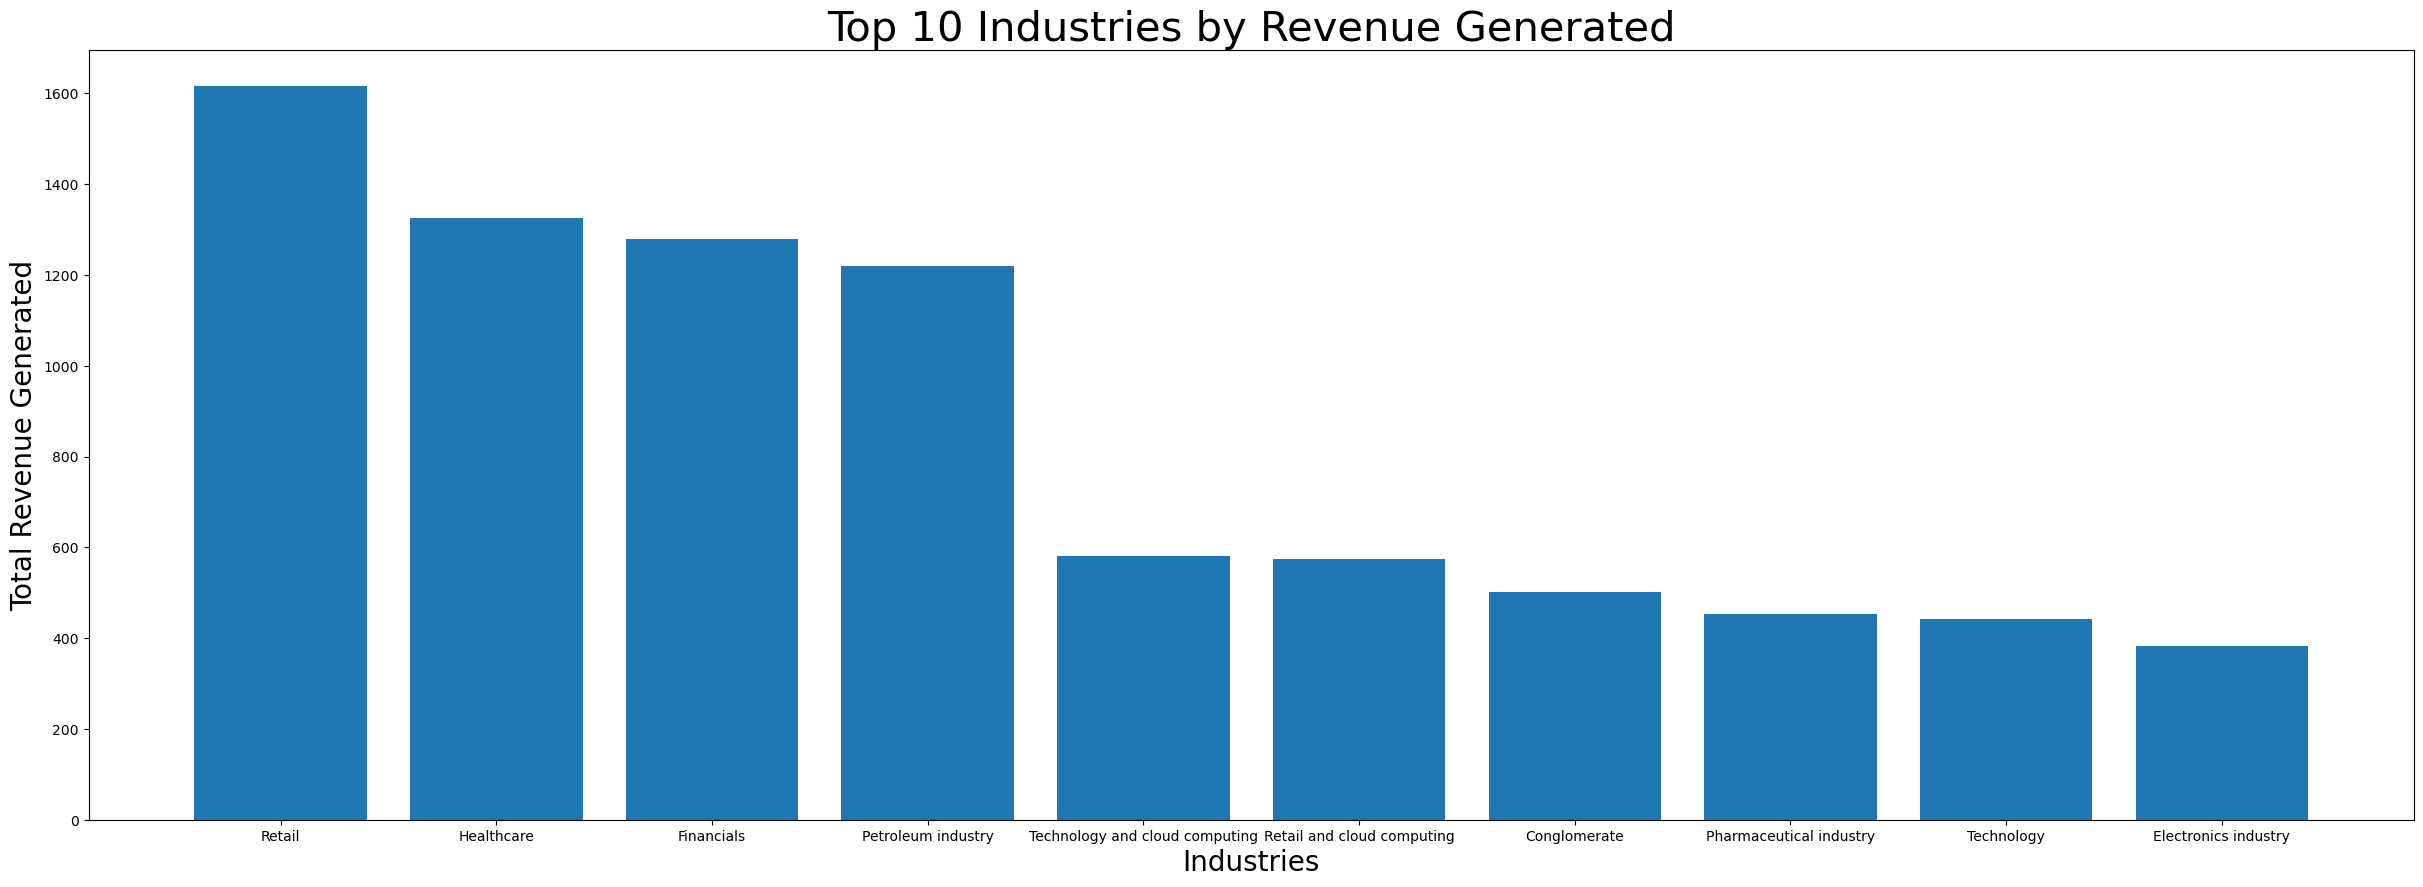

In [60]:
sorted_by_revenue = grouped_data.sort_values("Revenue (USD billions)", ascending = False)
plt.figure(figsize = (30, 10))
plt.bar(x= sorted_by_revenue.head(10)["Industry"], height=sorted_by_revenue.head(10)["Revenue (USD billions)"] )
plt.xlabel("Industries", fontsize = 20)
plt.ylabel("Total Revenue Generated", fontsize = 20)
plt.title("Top 10 Industries by Revenue Generated", fontsize = 30)
plt.show

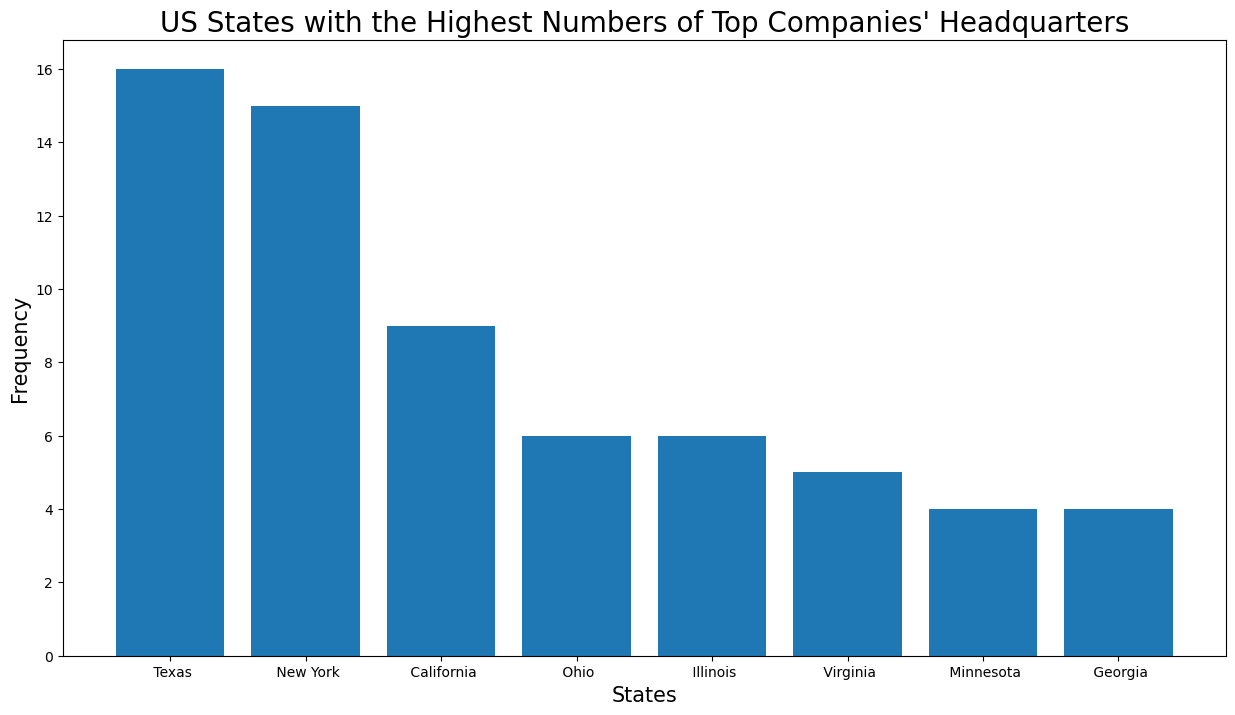

In [99]:
group_by_state = pd.DataFrame(df.groupby("Headquarters State")["Headquarters State"].value_counts().sort_values(ascending = False)).reset_index()
group_by_state.head(8)
plt.figure(figsize = (15,8))
plt.bar(group_by_state.head(8)["Headquarters State"], height = group_by_state.head(8)["count"])

plt.xlabel("States", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("US States with the Highest Numbers of Top Companies' Headquarters", fontsize = 20)
plt.show()

In [100]:
df.head()

,Rank,Name,Industry,Revenue (USD billions),Revenue growth,Employees,Headquarters City,Headquarters State
0,1,Walmart,Retail,648.125,6.0,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,574.785,11.9,1525000,Seattle,Washington
2,3,Apple,Electronics industry,383.482,-2.8,161000,Cupertino,California
3,4,UnitedHealth Group,Healthcare,371.622,14.6,440000,Minnetonka,Minnesota
4,5,Berkshire Hathaway,Conglomerate,364.482,20.7,396500,Omaha,Nebraska


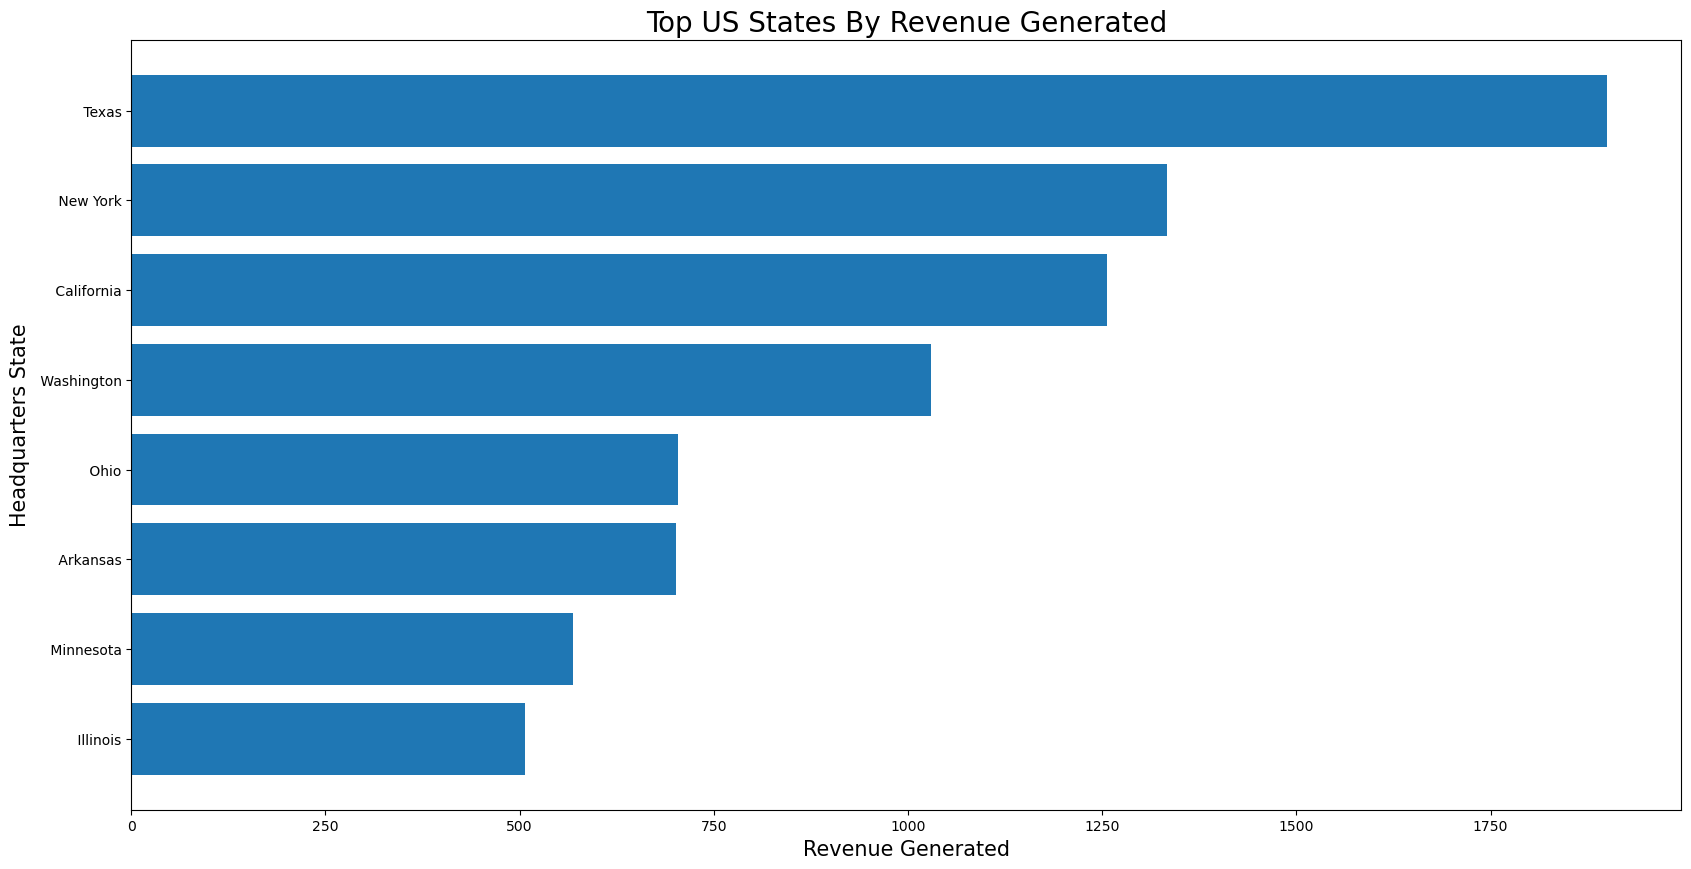

In [109]:
grouped_data_state = df.groupby("Headquarters State")[["Employees", "Revenue (USD billions)"]].sum().sort_values("Revenue (USD billions)").reset_index().tail(8)
plt.figure(figsize = (20,10))
plt.barh(grouped_data_state["Headquarters State"], width = grouped_data_state["Revenue (USD billions)"])
plt.xlabel("Revenue Generated", fontsize = 15)
plt.ylabel("Headquarters State", fontsize = 15)
plt.title("Top US States By Revenue Generated", fontsize = 20)
plt.show()

In [112]:
df[["Revenue (USD billions)", "Employees"]].corr()

,Revenue (USD billions),Employees
Revenue (USD billions),1.000000,0.699229
Employees,0.699229,1.000000


### Author

#### Zainab AKINTAYO 